In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from IPython.display import Markdown as md
import cosmology_plots as co_pl

os.chdir('..')
import cosmology as co
import plot_sets
os.chdir('cosmology')

"""
Author: Alberto Roper Pol
created: 01/12/2022
"""

### In this notebook, we will solve Friedmann equations to compute the time evolution of the scale factor, the energy density contributions to the universe, the Hubble rate and other important quantities

### Friedmann equations (in cosmic time):

## $$\frac{\ddot{a}}{a} = - \frac{1}{2} H_0^2 \Omega(a) \bigl[1 + 3w(a)\bigr], \quad
   \biggl(\frac{\dot{a}}{a}\biggr)^2 = H_0^2 \Omega(a) $$
   
### Friedmann equations (in conformal time):
   
## $$\frac{a''}{a_0^2\, a} = \frac{1}{2} \biggl(\frac{a}{a_0}\biggr)^2 \Omega(a) \bigl[1 - 3w(a)\bigr] H_0^2, \quad \frac{{\cal H}}{a_0} = \frac{a}{a_0} \sqrt{\Omega(a)}$$

## Total energy density $\Omega (a)$

#### In first place, using present-time values of the radiation, matter, and dark energy components of the universe, we can give the function for the total energy density, as a ratio to the present time total energy density.

### $$\Omega(a) = \Omega_{{\rm rad}, 0} a^{-4} + \Omega_{{\rm mat}, 0} a^{-3} + \Omega_{{\Lambda}, 0}$$

In [2]:
# Constants of the model
OmL0 = 0.6841      # Dark energy density as a fraction of present-time critical energy density
h0 = 0.6732        # Hubble rate H0 = 100 h0 km/s/Mpc
Neff = 3.          # effective number of neutrino species

# directory where to read the file for variation of dofs during RD era
dir0 = '../'

# compute variables at present time
g0, gS0, T0, H0, rho_rad0, OmR0 = co.values_0(h0=h0, neut=True, Neff=Neff, ret_rad=True)
OmM0 = 1 - OmL0 - OmR0

In [3]:
md("### We take the values at present time $\Omega_{\Lambda, 0} = %.4f$"%OmL0 + 
   " and $H_0 = %.2f$ km/s/Mpc"%(100*h0) + "\n" +
   "### The value of $\Omega_{{\\rm rad}, 0}$ is computed in the code " + 
   "and will be explained later, for now its value: \n" + 
   "### $$\Omega_{{\\rm rad}, 0} \, (g_*^0 = %.3f) = %.4f \\times 10^{-5}$$"%(g0, OmR0*1e5) + "\n"
   "### Taking into account that neutrinos become massive, then it is: \n" +
   "### $$\Omega_{{\\rm rad}, 0} \, (g_*^0 = 2) = %.4f \\times 10^{-5}$$"%(OmR0/g0*2*1e5))

### We take the values at present time $\Omega_{\Lambda, 0} = 0.6841$ and $H_0 = 67.32$ km/s/Mpc
### The value of $\Omega_{{\rm rad}, 0}$ is computed in the code and will be explained later, for now its value: 
### $$\Omega_{{\rm rad}, 0} \, (g_*^0 = 3.363) = 9.1742 \times 10^{-5}$$
### Taking into account that neutrinos become massive, then it is: 
### $$\Omega_{{\rm rad}, 0} \, (g_*^0 = 2) = 5.4566 \times 10^{-5}$$

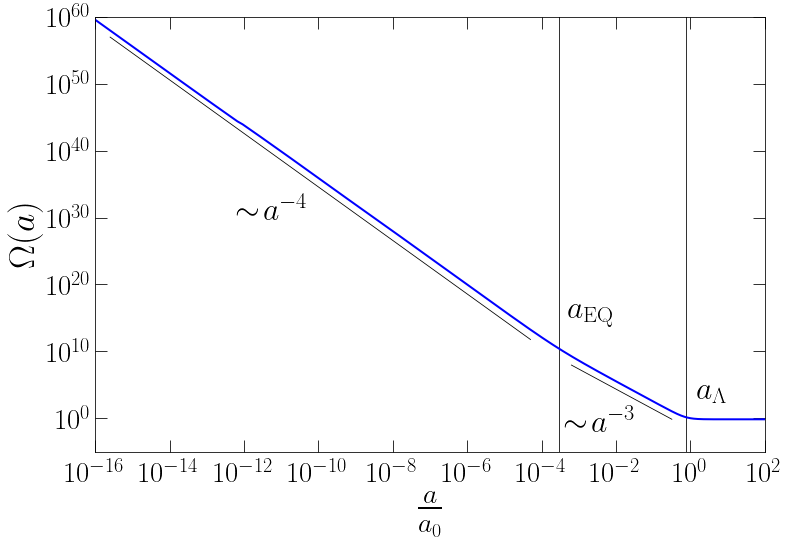

In [4]:
#### plot the evolution of the total energy density as a function of a

# Array of scale factors
a = np.logspace(-20, 2, 10000)

# compute energy density contributions as a ratio to present-time critical energy density
Om_tot, Om_rad, Om_mat = co.Omega_vs_a(a, h0=h0, OmL0=OmL0, dofs=True, dir0=dir0, Neff=Neff)

# Using Friedmann equations, we compute the eos (w), and the time derivatives of the
# scale factor
w, ad, add, ap, app = co.friedmann(a, h0=h0, OmL0=OmL0, dofs=True, dir0=dir0, Neff=Neff)

# equipartition and lambda-domination can be defined as the epochs
# at which the eos has an intermediate value
inds = np.argsort(w)
aEQ = np.interp(1/6, w[inds], a[inds])
aL = np.interp(-.5, w[inds], a[inds])
a_acc = np.interp(-1/3, w[inds], a[inds])

co_pl.plot_Omega_vs_a(a, Om_tot, OmR0, OmM0, aEQ, aL, save=True)

## Equation of state $w(a)$

#### The equation of state is $w=1/3$ for RD era, $w=0$ for MD era, and $w=-1$ for $\Lambda$D era. However, in general, it is a smooth function that will transition between epochs. Using Friedmann equations, it can be computed as

### $$ w(a) = \frac{\frac{1}{3} \Omega_{\rm rad} (a) - \Omega_{\Lambda, 0}}{\Omega (a)} $$

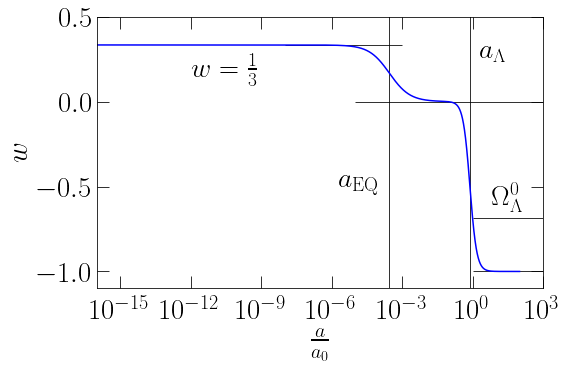

In [5]:
#### plot the evolution of the equation of state as a function of a
co_pl.plot_w_vs_a(a, w, OmL0, aEQ, aL, save=True)

### We can compute the times of equipartition $a_{\rm EQ}$ and that of dark-energy domination $a_\Lambda$ as those times at which $w$ takes intermediate values. We obtain:

In [6]:
md("### Equipartition occurs at: \n ### $\\frac{a_{\\rm EQ}}{a_0} = %.3f \\times 10^{-4}$"%(aEQ*1e4) + 
   "\n" +
   "### Dark-energy domination occurs at: \n ### $\\frac{a_\Lambda}{a_0} = %.3f$"%(aL))

### Equipartition occurs at: 
 ### $\frac{a_{\rm EQ}}{a_0} = 2.905 \times 10^{-4}$
### Dark-energy domination occurs at: 
 ### $\frac{a_\Lambda}{a_0} = 0.773$

## Hubble rate $H(a) = \dot{a}/a$ and ${\cal H} = a'/a$

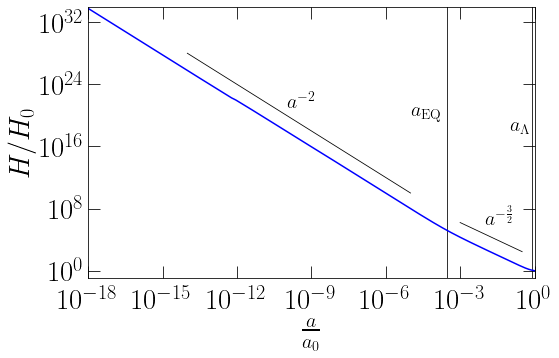

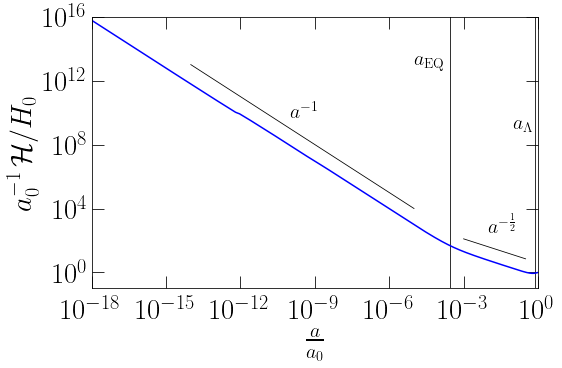

In [7]:
#### plot the Hubble and the conformal Hubble rates
co_pl.plot_Hubble_vs_a(a, ad, H0, aL, aEQ, ap, save=True)

## Acceleration of the universe $\ddot{a}/a$ and $a''/a$

#### The acceleration of the Universe is negative for values $w > -1/3$ and the acceleration occurs when $w = -1/3$:

In [8]:
md("### The accelerated universe starts at: \n" + 
   "### $\\frac{a_{\\rm acc}}{a_0} = %.3f$"%a_acc)

### The accelerated universe starts at: 
### $\frac{a_{\rm acc}}{a_0} = 0.614$

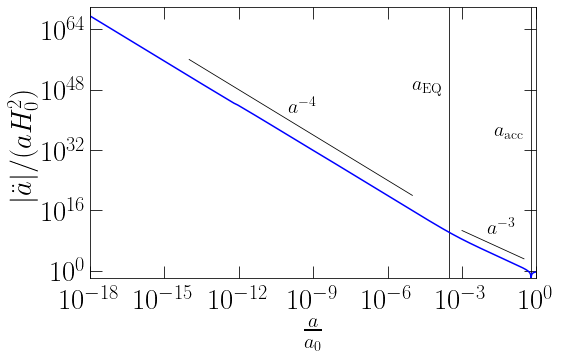

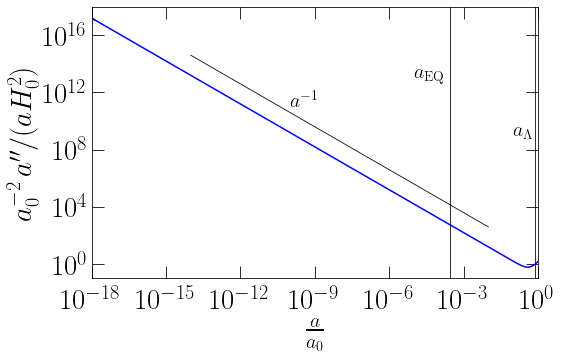

In [9]:
#### plot the acceleration of the Universe's expansion in terms
#### of cosmic time \ddot{a}/a and conformal time a''/a
co_pl.plot_derHubble_vs_a(a, add, H0, aL, aEQ, app, a_acc, save=True)

#### We have now all the variables that enter Friedmann equations as functions of the scale factor so we can solve them to get the time (cosmic and conformal) evolutions of $a$ (or viceversa)

In [10]:
# Use Friedmann solver to compute the cosmic and conformal time as functions of the scale
# factor a
t, eta = co.friedmann_solver(a, a0=1., h0=h0, OmL0=OmL0, dir0=dir0, dofs=True, Neff=Neff)

Entering Friedmann solver
The results are saved in the file friedmann/solution.csv
The input parameters used are stored in friedmann/README.txt
Leaving Friedmann solver


In [11]:
# Compute specific times
eta0 = np.interp(1, a, eta)
t0 = np.interp(1, a, t)
tH0 = 1/H0
etaEQ = np.interp(aEQ, a, eta).to(u.yr)
etaL = np.interp(aL, a, eta).to(u.yr)
eta_acc = np.interp(a_acc, a, eta).to(u.yr)
tEQ = np.interp(aEQ, a, t).to(u.yr)
tL = np.interp(aL, a, t).to(u.yr)
t_acc = np.interp(a_acc, a, t).to(u.yr)

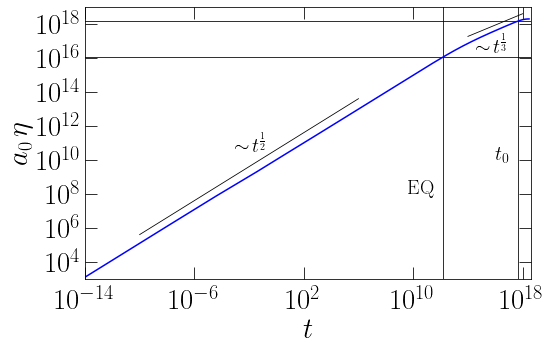

In [12]:
### plot conformal vs cosmic times
co_pl.plot_eta_vs_t(t, eta, t0, eta0, tEQ, etaEQ, save=True)

## Time-evolution of the scale factor $a(t)$ and $a(\eta)$

### In first place, from the solution we can compute what is the current age of the Universe, today's Hubble rate from the input parameters, as well as the times at which equipartition and $\Lambda$ dominance occur.

### In general, we obtained the time evolution of $a$ vs $t$ and $\eta$.

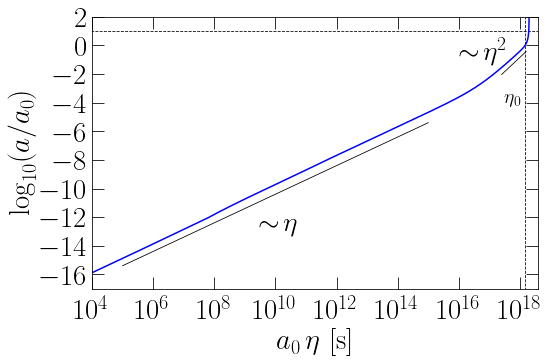

In [13]:
## plot a vs conformal time
co_pl.plot_a_vs_eta(eta, a, eta0, save=True)

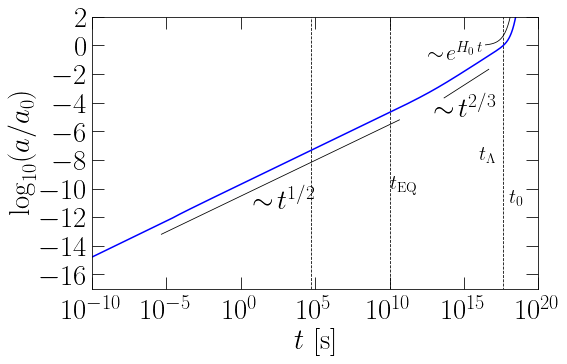

In [14]:
## plot a vs cosmic time
co_pl.plot_a_vs_t(t, a, H0, tEQ, tL, t0, save=True)

In [15]:
md("### The age of the universe at present time is %.0f"%t0.to(u.Myr).value +
   " cosmic Myrs and %.0f conformal Myrs"%eta0.to(u.Myr).value + "\n" +
   "### In terms of the Hubble time at present time ($H_0 = %.2f$ Myrs) "%tH0.to(u.Myr).value +
   "this becomes: \n" +
   "#### $t_0 = %.3f \, H_0^{-1}$,"%(t0*H0) + "$\quad$" + 
   "$\eta_0 = %.3f \, H_0^{-1}$"%(eta0*H0))

### The age of the universe at present time is 13797 cosmic Myrs and 46142 conformal Myrs
### In terms of the Hubble time at present time ($H_0 = 14524.54$ Myrs) this becomes: 
#### $t_0 = 0.950 \, H_0^{-1}$,$\quad$$\eta_0 = 3.177 \, H_0^{-1}$

In [16]:
md("### Similarly, equipartition and dark-energy dominance occur at the times: \n" + 
   "### $$t_{\\rm EQ} = %.2f {\\rm \, yrs}, \\quad "%tEQ.value + 
    "t_{\Lambda} = %.2f {\\rm \, Myrs}$$"%(tL.value/1e6) + "\n" 
    "### $$\\eta_{\\rm EQ} = %.2f {\\rm \, Myrs}, \\quad "%(etaEQ.value/1e6) + 
    "\\eta_{\Lambda} = %.2f {\\rm \, Myrs}$$"%(etaL.value/1e6) + "\n" +
   "### In terms of the Hubble time at present time ($H_0 = %.0f$ Myrs)"%tH0.to(u.Myr).value +
   " this becomes: \n" +
   "#### $$t_{\\rm EQ} = %.3f \\times 10^{-3} \, H_0^{-1},"%(tEQ*H0*1e6) + "\quad" + 
   "\eta_{\\rm EQ} = %.3f \, H_0^{-1}"%(etaEQ*H0) + 
   ", \quad t_\Lambda = %.3f \, H_0^{-1}, \quad \eta_\Lambda = %.3f \, H_0^{-1}$$"%(tL*H0, etaL*H0))

### Similarly, equipartition and dark-energy dominance occur at the times: 
### $$t_{\rm EQ} = 49975.20 {\rm \, yrs}, \quad t_{\Lambda} = 10315.31 {\rm \, Myrs}$$
### $$\eta_{\rm EQ} = 364.93 {\rm \, Myrs}, \quad \eta_{\Lambda} = 42184.34 {\rm \, Myrs}$$
### In terms of the Hubble time at present time ($H_0 = 14525$ Myrs) this becomes: 
#### $$t_{\rm EQ} = 3.441 \times 10^{-3} \, H_0^{-1},\quad\eta_{\rm EQ} = 0.025 \, H_0^{-1}, \quad t_\Lambda = 0.710 \, H_0^{-1}, \quad \eta_\Lambda = 2.904 \, H_0^{-1}$$

## Radiation-dominated (RD) era

### During the RD era, the energy density can be computed as

### $$ \rho_{\rm rad} = \frac{\pi^2}{30} g_*^2 T^4 $$

### The temperature can be related to the scale factor assuming adiabatic expansion of the Universe

### $$\frac{T}{T_0} = \frac{a_0}{a} \biggl(\frac{g_{\rm S}}{g_{\rm S}^0}\biggr)^{-{1\over3}}$$

### The ratio of radiation energy density to present-time energy does not only scale as $a^{-4}$ but also depends on the relativistic $g$ and adiabatic $g_{\rm S}$ degrees of freedom:

### $${\Omega_{\rm rad}} (a) = \Omega_{{\rm rad}, 0} \biggl(\frac{a}{a_0}\biggr)^{-4}
    \frac{g_*}{g_*^0} \biggl(\frac{g_{\rm S}}{g_{\rm S}^0}\biggr)^{-{4\over3}}$$

In [17]:
md("### In addition, we can compute $\Omega_{\\rm rad}$ at present time:\n" + 
   "## $$ \Omega_{{\\rm rad}, 0} = %.3f \, h_0^{-2} \\times 10^{-5} \\frac{g_*^0}{2}$$ \n"%(OmR0*h0**2/g0*2*1e5) + 
   "### which, taking $h_0 = %.4f$ and $g_*^0 = %.3f$ to take into account neutrinos, yields \n"%(h0, g0) + 
   "## $$ \Omega_{{\\rm rad}, 0} = %.3f \\times 10^{-5}$$"%(OmR0*1e5))

### In addition, we can compute $\Omega_{\rm rad}$ at present time:
## $$ \Omega_{{\rm rad}, 0} = 2.473 \, h_0^{-2} \times 10^{-5} \frac{g_*^0}{2}$$ 
### which, taking $h_0 = 0.6732$ and $g_*^0 = 3.363$ to take into account neutrinos, yields 
## $$ \Omega_{{\rm rad}, 0} = 9.174 \times 10^{-5}$$

In [18]:
 md("### The values at present time, including neutrinos as relativistic species" + 
   "(otherwise neutrino decoupling should be taken into account in the time evolution of degrees of freedom), are \n" +
   "### $$g_*^0 = 2 \\biggl[1 + N_{\\rm eff} \\frac{7}{8} \Bigl(\\frac{4}{11}\\Bigr)^{4\over3}\\biggr]" + 
   "\\approx %.4f$$"%g0 + 
   "$$g_{\\rm S}^0 = 2 \\biggl[1 + N_{\\rm eff} \\frac{7}{8} \\frac{4}{11}\\biggr]" + 
   "\\approx %.4f$$"%gS0)

### The values at present time, including neutrinos as relativistic species(otherwise neutrino decoupling should be taken into account in the time evolution of degrees of freedom), are 
### $$g_*^0 = 2 \biggl[1 + N_{\rm eff} \frac{7}{8} \Bigl(\frac{4}{11}\Bigr)^{4\over3}\biggr]\approx 3.3626$$$$g_{\rm S}^0 = 2 \biggl[1 + N_{\rm eff} \frac{7}{8} \frac{4}{11}\biggr]\approx 3.9091$$

### Now we show the evolution of degrees of freedom during the RD era

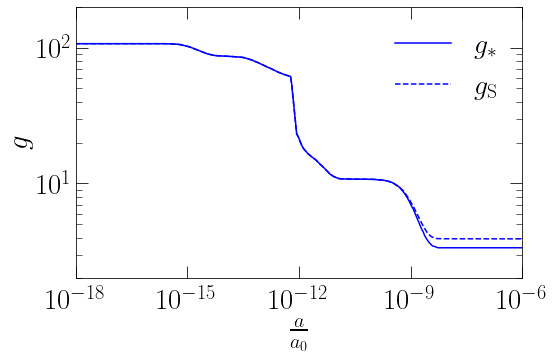

In [19]:
#### plot relativistic gs and adiabatic gs_S as a function of scale factor within RD era

T, as_T, gs, gS = co.RD_dofs(dir0=dir0, Neff=Neff)
co_pl.plot_gs_gS_vs_T(T, as_T, gs, gS, save=True)

### In particular, the variation of the degrees of freedom during the RD era includes the following factor to the radiation energy density

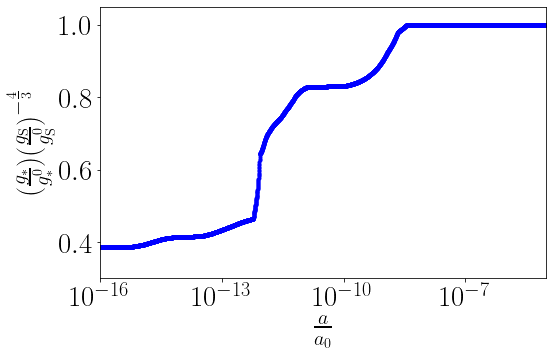

In [20]:
#### plot ratio between Om_rad with and without considering the modification on the total degrees of
#### freedom

Om_rat = co.Omega_rad_dof(a, dir0=dir0, Neff=Neff)
co_pl.plot_Omrad_rat_vs_a(a, Om_rat, save=True)

In [36]:
md("### The term $a''$ is taken to be zero during RD era since $w = 1/3$. However, it is not exactly zero" + 
  " and it can be computed from the smooth equation of state, solution to Friedmann equations: \n" + 
  "### $$1 - 3 w = \\frac{\Omega_{\\rm mat} + 4 \Omega_{\Lambda, 0}}{\Omega (a)}" + 
  "\\approx \\frac{\Omega_{\\rm mat} (a)}{\Omega_{\\rm rad} (a)}" + 
  "= \\frac{\Omega_{{\\rm mat}, 0}}{\Omega_{{\\rm rad}, 0}} \\frac{g_*^0}{g_*}" + 
  " \\biggl(\\frac{g_{\\rm S}}{g_{\\rm S}^0}\\biggr)^{{4\over3}} a$$ \n" + 
  "### The term that depends on the degrees of freedom is shown in the plot above! and has a " + 
  "maxium value at early times $a/a_0 < 10^{-16}$ of %.4f."%(1/min(Om_rat)) + 
  " This value corresponds to an upper bound in the term $a''/a$.")

### The term $a''$ is taken to be zero during RD era since $w = 1/3$. However, it is not exactly zero and it can be computed from the smooth equation of state, solution to Friedmann equations: 
### $$1 - 3 w = \frac{\Omega_{\rm mat} + 4 \Omega_{\Lambda, 0}}{\Omega (a)}\approx \frac{\Omega_{\rm mat} (a)}{\Omega_{\rm rad} (a)}= \frac{\Omega_{{\rm mat}, 0}}{\Omega_{{\rm rad}, 0}} \frac{g_*^0}{g_*} \biggl(\frac{g_{\rm S}}{g_{\rm S}^0}\biggr)^{{4\over3}} a$$ 
### The term that depends on the degrees of freedom is shown in the plot above! and has a maxium value at early times $a/a_0 < 10^{-16}$ of 2.5904. This value corresponds to an upper bound in the term $a''/a$.

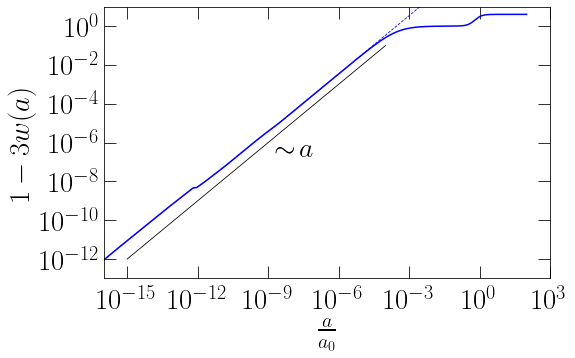

In [22]:
### plot the term 1 - 3w that determines a''/a and is usually assumed 0 during RD era
co_pl.plot_dofs_rad(a, w, Om_mat, Om_rad, save=True)

### During the RD era $\eta {\cal H} = 1$ and during the MD era $\eta {\cal H} = 2$.
### Using the solution from Friedmann equations, we can show the deviations $\eta {\cal H} - 1$ as a function of $a$.

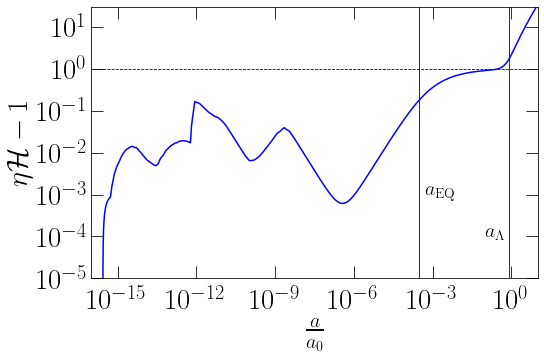

In [23]:
### plot HH x \eta vs a
co_pl.plot_etaH_vs_a(a, ap, eta, aEQ, aL, save=True)